# Diffuse reflectance and optical band gap analysis for perovskite, TiO2, powdered TiO2 and Zno samples

Authors: Valentina Pérez Cadavid, César Antonio Hoyos Peláez and Sebástian Montoya Hernández. 

## Abstract

<div aling="justify"> 
In the present work the experimental results of diffuse reflectance plots, tauc plots and optical band gap for the study of four samples: perovskite, zinc dioxide, titanium dioxide and its powder sample are presented. According to the analysis it was found that each of these materials presents an optical band gap similar to that presented in the literature, however the lack of knowledge in the manufacturing process of each sample generates a bias in the data obtained, thus giving little precision to obtain a measure of error with respect to a real value.
</div>

## Introduction

<div align="justify">
Absorption in semiconductors is a fundamental phenomenon in the optics of materials and is of great importance in various technological applications. In this work the main features of semiconductor absorption will be discussed, with special emphasis on direct and indirect transitions, diffuse reflection and Tauc plots.
</div>  

<div align="justify">
In semiconductors, light absorption is mainly due to the excitation of electrons from the valence state to the conduction state. If the transition occurs without significant change in the amount of momentum, it is said to be a direct transition, whereas if it involves a change in momentum, it is called an indirect transition. Absorption in semiconductors depends on the energy of the incident light and the properties of the material, such as its band structure, density of states and temperature [1].
</div>

<div align="justify">
Diffuse reflection is a process in which light incident on a material is scattered in all directions due to local fluctuations in electron density. This process plays an important role in semiconductor absorption, as it can significantly increase the absorption of light in the material. An important tool for characterizing absorption in semiconductors is the Tauc plot, which relates absorption to the energy of the incident light. This plot is particularly useful for identifying the band structure of the material and for determining optical properties, such as the forbidden bandgap. [2]
</div>

<div align="justify">
The practical applications of semiconductor absorption are numerous and cover areas such as solar energy, electronics and photonics. In solar energy, semiconductor absorption is essential for the conversion of light energy into electrical energy in solar panels. In electronics, absorption is used in light detection and in the fabrication of optoelectronic devices such as LEDs and lasers. In photonics, it is used in the fabrication of photonic devices, such as optical filters and light modulators [3].
 </div> 

## Theoretical framework

**Diffuse reflectance**

<div align="justify">
When light strikes a surface, part of the light is reflected in a specular manner, as happens in a mirror, and another part is reflected in a diffuse manner; therefore, diffuse reflectance is defined as the amount of light that is reflected from a surface uniformly in all directions. This type of reflectance has several applications, for example in the measurement and characterization of surfaces, where information is obtained on their texture, brightness, and uniformity; it is also widely used in the food industry to determine the quality and maturity of foods.
</div>

<div align="justify">
From the interaction of a sample with an incident light beam, a relationship between the intensities can be obtained mathematically.
</div>

\begin{equation}
I_0 = I_a + I_t + I_r + I_s \quad \text{(1)}
\end{equation>

<div align="justify">
Where $I_0$ is the incident beam intensity, $I_a$ the absorbed intensity, $I_t$ the transmitted intensity, $I_s$ the intensity due to the scattering process, and finally $I_r$ the specularly reflected intensity. With equation (1), the diffuse reflectance $R_\infty$ can be calculated from the relationship between the intensities $I_0$ and $I_s$ as follows:
</div>

\begin{equation}
R_\infty = \frac{I_0}{I_s} \quad \text{(2)}
\end{equation>

<div align="justify">
Experimentally, the measurement of diffuse reflection is performed by using an integrating sphere, which inside is covered by a material with a high diffuse reflection generating a beam of incident light that is scattered in all directions. Finally the beam information is obtained from a small aperture containing a detector.
</div>

**Kubelka-Munk Function**

<div align="justify">
When attempting to study an opaque sample whose composition consists of various particle sizes, the Kubelka-Munk equation can be used to find the relationship between the reflectance and transmittance of the sample. Mathematically, the relationship is expressed as:
</div>

\begin{equation}
F_{R_\infty} = \frac{(1-R_\infty)^2}{2R_\infty} \quad \text{(3)}
\end{equation>

<div align="justify">
Additionally, equation (3) can be used to obtain a graphical representation of the optical absorption as a function of the energy of the incident photon in a material, in order to obtain information about the energies of the Band gap that characterizes it. This relationship is given by equation (4):
</div>

\begin{equation}
(F_{R_\infty} \cdot h\nu )^{1/\gamma} = h\nu - E_g \quad \text{(4)}
\end{equation>

Where $\gamma = 1/2$ for direct transitions and $\gamma = 2$ for indirect transitions.

<div align="justify">
Experimentally, perovskite is reported to have a band gap in the range $(1.2, 2.3) eV$, titanium dioxide at $(2.3,3) eV$, and zinc oxide of approximately 3.37 eV [4-6].
</div>


## Experimental Results

In [2]:
#Librerías 
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from scipy.signal import medfilt
from scipy.interpolate import interp1d


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


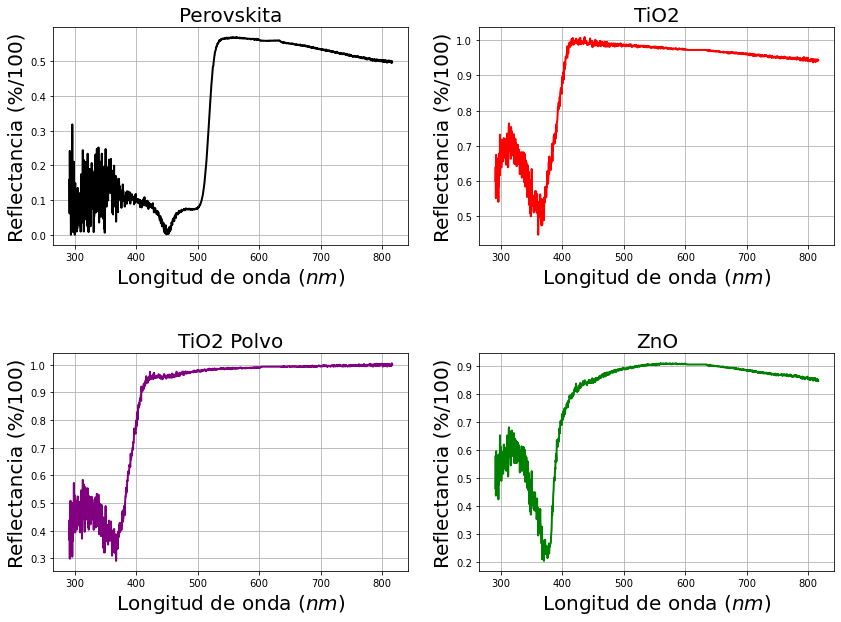

In [83]:
#Usamos pandas para cargar los espectros tomados con el Ocean Optics 2000
#lim y lim2 nos permite acotar el rango del espectro a tomar. Las longuitudes de onda donde la señal de referencia es muy baja deben despreciarse, ya tendran un gran error en la reflectancia.
lim=300
lim2=200
#Window size determina un tamaño de filtro para suavizar el espectro. Debe ser un valor par.
Window_size=201
''' 
    Se carga la señal de la referencia 
'''
f = pd.read_csv(r'./Perov.Master.reference', sep='\t',skiprows=14, skipfooter=1)
f1 = pd.read_csv(r'./TiO2.Master.reference', sep='\t',skiprows=14, skipfooter=1)
f2 = pd.read_csv(r'./TiO2Polvo.Master.reference', sep='\t',skiprows=14, skipfooter=1)
f3 = pd.read_csv(r'./ZnO.Master.reference', sep='\t',skiprows=14, skipfooter=1)
Is = np.array(f)[lim:-lim2,1]
IsTiO2 = np.array(f1)[lim:-lim2,1]
IsTiO2Polvo = np.array(f2)[lim:-lim2,1]
IsZnO = np.array(f3)[lim:-lim2,1]
''' 
    Longitud de onda  
'''
wld = np.array(f)[lim:-lim2,0] #Longitudes de onda entre 291 y 816 

''' 
    Se carga la señal oscura de la muestra 
'''
f = pd.read_csv(r'./Perov.Master.dark', sep='\t',skiprows=14, skipfooter=1)
f1 = pd.read_csv(r'./TiO2.Master.dark', sep='\t',skiprows=14, skipfooter=1)
f2 = pd.read_csv(r'./TiO2Polvo.Master.dark', sep='\t',skiprows=14, skipfooter=1)
f3 = pd.read_csv(r'./ZnO.Master.dark', sep='\t',skiprows=14, skipfooter=1)
Ir1 = np.array(f)[lim:-lim2,1]
Ir1TiO2 = np.array(f1)[lim:-lim2,1]
Ir1TiO2Polvo = np.array(f2)[lim:-lim2,1]
Ir1ZnO = np.array(f3)[lim:-lim2,1]

''' 
    Se carga la señal de la muestra 
'''
f = pd.read_csv(r'./Perov.Master.sample', sep='\t',skiprows=14, skipfooter=1)
f1 = pd.read_csv(r'./TiO2.Master.sample', sep='\t',skiprows=14, skipfooter=1)
f2 = pd.read_csv(r'./TiO2Polvo.Master.sample', sep='\t',skiprows=14, skipfooter=1)
f3 = pd.read_csv(r'./ZnO.Master.sample', sep='\t',skiprows=14, skipfooter=1)
Is1 = np.array(f)[lim:-lim2,1]
Is1TiO2 = np.array(f1)[lim:-lim2,1]
Is1TiO2Polvo = np.array(f2)[lim:-lim2,1]
Is1ZnO = np.array(f3)[lim:-lim2,1]

''' 
    Filtrado del espectro y la referencia 
'''
Is1=medfilt(medfilt(Is1,kernel_size=Window_size))
Is1TiO2=medfilt(medfilt(Is1TiO2,kernel_size=Window_size))
Is1TiO2Polvo=medfilt(medfilt(Is1TiO2Polvo,kernel_size=Window_size))
Is1ZnO=medfilt(medfilt(Is1ZnO,kernel_size=Window_size))

Is=medfilt(medfilt(Is,kernel_size=Window_size))
IsTiO2=medfilt(medfilt(IsTiO2,kernel_size=Window_size))
IsTiO2Polvo=medfilt(medfilt(IsTiO2Polvo,kernel_size=Window_size))
IsZnO=medfilt(medfilt(IsZnO,kernel_size=Window_size))

'''
    Se calcula la reflectancia y se grafica
'''
R1perov = abs ( (Is1 - Ir1) / (Is - Ir1) )
R1TiO2 = abs( (Is1TiO2 - Ir1TiO2) / (IsTiO2 - Ir1TiO2) )
R1TiO2Polvo = abs( (Is1TiO2Polvo - Ir1TiO2Polvo) / (IsTiO2Polvo - Ir1TiO2Polvo) )
R1ZnO = abs( (Is1ZnO - Ir1ZnO) / (IsZnO - Ir1ZnO) )

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

ax1.plot(wld, R1perov, '-', lw=2, color='black')
ax1.grid()
ax2.plot(wld, R1TiO2, '-', lw=2, color='red')
ax2.grid()
ax3.plot(wld, R1TiO2Polvo, '-', lw=2, color='purple')
ax3.grid()
ax4.plot(wld, R1ZnO, '-', lw=2, color='green')
ax4.grid()

plt.subplots_adjust(hspace=0.5) # Puedes cambiar el valor para ajustar la distancia


ax1.set_title('Perovskita', fontsize=20)
ax2.set_title('TiO2',  fontsize=20)
ax3.set_title('TiO2 Polvo',  fontsize=20)
ax4.set_title('ZnO',  fontsize=20)
ax1.set_xlabel('Longitud de onda $(nm)$', fontsize=20)
ax1.set_ylabel('Reflectancia (%/100)', fontsize=20)
ax2.set_xlabel('Longitud de onda $(nm)$', fontsize=20)
ax2.set_ylabel('Reflectancia (%/100)', fontsize=20)
ax3.set_xlabel('Longitud de onda $(nm)$', fontsize=20)
ax3.set_ylabel('Reflectancia (%/100)', fontsize=20)
ax4.set_xlabel('Longitud de onda $(nm)$', fontsize=20)
ax4.set_ylabel('Reflectancia (%/100)', fontsize=20)

plt.show()

'''
    Calculo la energía en eV
'''
wld = wld*1e-9
h = 4.1357E-15
c = 2.99E8
E = (c * h)/wld

'''
    Se define la función de Kubelka-Munk
'''
def KM(R):
    r = np.where(R == 0, 0.01, R)
    a = (1 - np.array(r))**2 
    b = 2 * np.array(r)    
    return a / b



<div align="justify">The first figure shows the different results for the diffuse reflectance graph of 4 different compounds: perovskite, titanium dioxide, titanium dioxide powder sample and zinc dioxide. By means of this type of measurements it is possible to characterize the optical properties of a material, for example, by means of this measurement the opacity of the material is characterized and it allows to understand how light interacts with it. </div>

<div align="justify"> It can be observed for the different samples that a reflectance measurement for wavelengths less than 400 nm contains a lot of noise, which is due to limitations in the spectrometer. Furthermore, it is evident that in the range between 400 and 700 nm, the Titanium Dioxide and Zinc Dioxide samples reach their highest light reflection, while the Perovskite sample does not follow the same behavior.
</div>



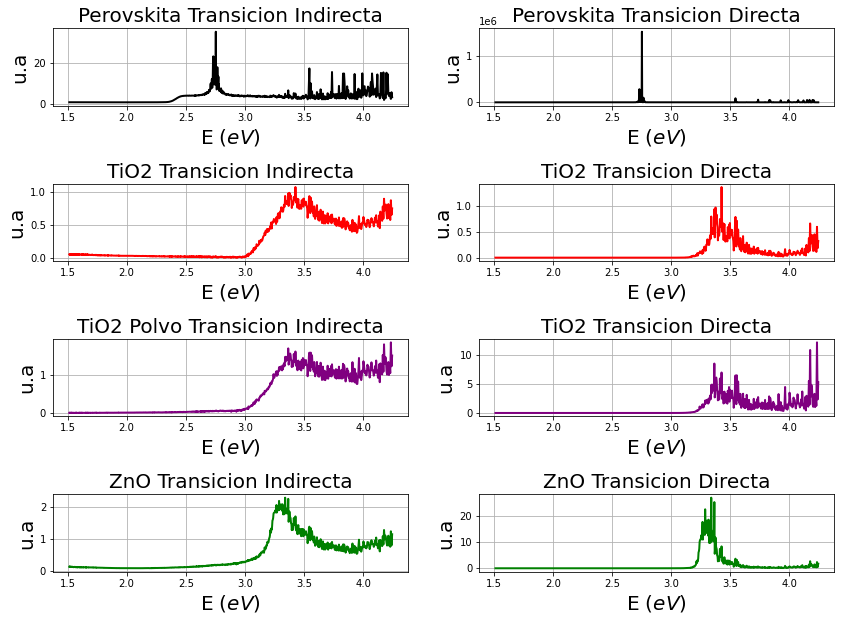

In [124]:
'''
    Hacemos las gráficas TAUC
'''
evalPerovI = (KM(R1perov)*E)**(1/2) # Indirecta
evalPerovD = (KM(R1perov)*E)**(2) # Directa

evalTiO2I = (KM(R1TiO2)*E)**(1/2) # Indirecta
evalTiO2D = (KM(R1TiO2)*E)**(2) # Directa

evalTiO2PolvoI = (KM(R1TiO2Polvo)*E)**(1/2) # Indirecta
evalTiO2PolvoD = (KM(R1TiO2Polvo)*E)**(2) # Directa

evalZnOI = (KM(R1ZnO)*E)**(1/2) # Indirecta
evalZnOD = (KM(R1ZnO)*E)**(2) # Directa

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,10))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]
ax7 = axes[3,0]
ax8 = axes[3,1]

ax1.plot(E, evalPerovI, '-', lw=2, color='black')
ax1.grid()
ax2.plot(E, evalPerovD, '-', lw=2, color='black')
ax2.grid()
ax3.plot(E, evalTiO2I, '-', lw=2, color='red')
ax3.grid()
ax4.plot(E, evalTiO2D, '-', lw=2, color='red')
ax4.grid()
ax5.plot(E, evalTiO2PolvoI, '-', lw=2, color='purple')
ax5.grid()
ax6.plot(E, evalTiO2PolvoD, '-', lw=2, color='purple')
ax6.grid()
ax7.plot(E, evalZnOI, '-', lw=2, color='green')
ax7.grid()
ax8.plot(E, evalZnOD, '-', lw=2, color='green')
ax8.grid()

plt.subplots_adjust(hspace=1) # Puedes cambiar el valor para ajustar la distancia

ax1.set_title('Perovskita Transicion Indirecta', fontsize=20)
ax2.set_title('Perovskita Transicion Directa', fontsize=20)
ax3.set_title('TiO2 Transicion Indirecta', fontsize=20)
ax4.set_title('TiO2 Transicion Directa', fontsize=20)
ax5.set_title('TiO2 Polvo Transicion Indirecta', fontsize=20)
ax6.set_title('TiO2 Transicion Directa', fontsize=20)
ax7.set_title('ZnO Transicion Indirecta', fontsize=20)
ax8.set_title('ZnO Transicion Directa', fontsize=20)

axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# Etiquetas a aplicar
xlabel = 'E $(eV)$'
ylabel = 'u.a'

# Iterar a través de los objetos de subplot y aplicar etiquetas
for ax in axes_list:
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)

<div align="justify"> In this part the results obtained for the different Tauc plots of the different samples in direct and indirect transitions are analyzed, as mentioned in the theoretical framework. On the dependent axis the Kubelka-Munk product function is presented with the energy in electron volts raised to a value depending on whether the study is based on direct or indirect transition, likewise on the independent axis energy values in electron volts are given. In this case, this type of graphs allow to find the optical band gap of each material that accounts for the energy required to excite an electron from its fundamental state to a higher energy state, generally allows to know the energy required to excite an electron from the valence band to the conduction band through the absorption of light.
 </div>

<div align="justify"> The band gap in the direct and indirect transitions can be found by the slope. Since these curves have several peaks, the first peak is chosen. Since in this case it is impossible to find a slope over the whole range, the first peak is zoomed in, and then the derivative of the data around it is found as shown in the following code fragment.
</div>


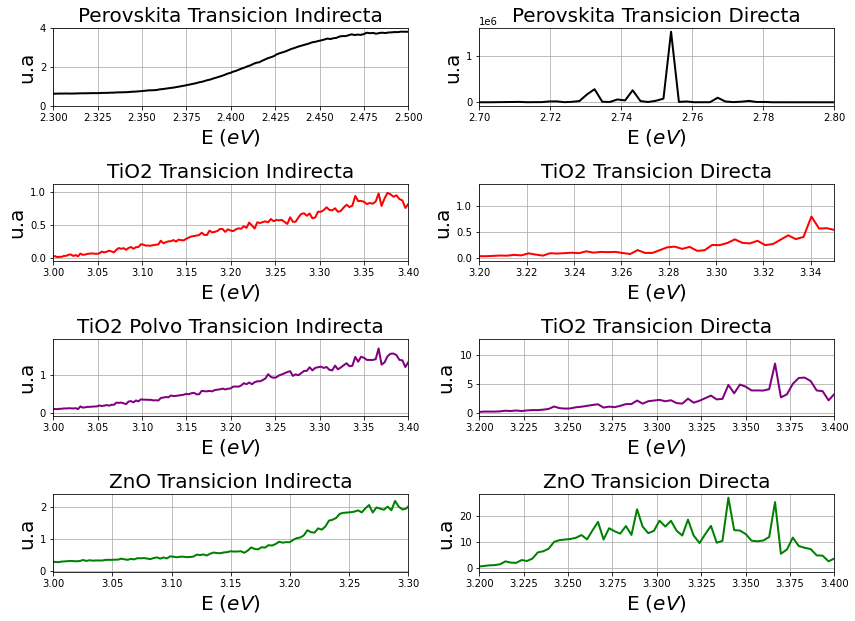

In [145]:
'''
    Se hace un zoom sobre las anteriores gráficas con el fin de observar con mayor claridad
    la primera pendiente 
'''

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,10))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]
ax7 = axes[3,0]
ax8 = axes[3,1]

ax1.plot(E, evalPerovI, '-', lw=2, color='black')
ax1.set_xlim(2.3, 2.5)
ax1.set_ylim(0, 4)
ax1.grid()
ax2.plot(E, evalPerovD, '-', lw=2, color='black')
ax2.set_xlim(2.7, 2.8)
ax2.grid()
ax3.plot(E, evalTiO2I, '-', lw=2, color='red')
ax3.set_xlim(3, 3.4)
ax3.grid()
ax4.plot(E, evalTiO2D, '-', lw=2, color='red')
ax4.set_xlim(3.20, 3.35)
ax4.grid()
ax5.plot(E, evalTiO2PolvoI, '-', lw=2, color='purple')
ax5.set_xlim(3, 3.4)
ax5.grid()
ax6.plot(E, evalTiO2PolvoD, '-', lw=2, color='purple')
ax6.set_xlim(3.20, 3.4)
ax6.grid()
ax7.plot(E, evalZnOI, '-', lw=2, color='green')
ax7.set_xlim(3.0, 3.3)
ax7.grid()
ax8.plot(E, evalZnOD, '-', lw=2, color='green')
ax8.set_xlim(3.20, 3.4)
ax8.grid()

plt.subplots_adjust(hspace=1) # Puedes cambiar el valor para ajustar la distancia

ax1.set_title('Perovskita Transicion Indirecta', fontsize=20)
ax2.set_title('Perovskita Transicion Directa', fontsize=20)
ax3.set_title('TiO2 Transicion Indirecta', fontsize=20)
ax4.set_title('TiO2 Transicion Directa', fontsize=20)
ax5.set_title('TiO2 Polvo Transicion Indirecta', fontsize=20)
ax6.set_title('TiO2 Transicion Directa', fontsize=20)
ax7.set_title('ZnO Transicion Indirecta', fontsize=20)
ax8.set_title('ZnO Transicion Directa', fontsize=20)

axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# Etiquetas a aplicar
xlabel = 'E $(eV)$'
ylabel = 'u.a'

# Iterar a través de los objetos de subplot y aplicar etiquetas
for ax in axes_list:
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)

<div align="justify">
The results for the optical band gap are shown at the bottom for each transition. It should be noted that for the different results, a precise analysis of the optical band gap values cannot be provided due to uncertainty in the way the sample was synthesized.
</div>
<div align="justify">
- In the case of perovskite, it is observed that the optical band gap has the same value for both direct and indirect transitions, which is contrary to the literature. Typically, in perovskite, the energy gap for the indirect transition is greater than that for the direct transition. For instance, in semiconductor materials, the indirect energy gap is generally larger due to direct transitions being more likely due to kinetic momentum. However, the energy gap for the indirect transition in perovskite can vary depending on the specific type of perovskite and the material's manufacturing or processing conditions. A detailed analysis of how the optical band gap varies depending on manufacturing can be found in the following reference [6].
</div>
<div align="justify">
- In the case of titanium dioxide samples, the optical band gap matches the literature only for a direct transition of TiO2. The other measurements were inconclusive, and it is concluded that they need to be retaken since, in various references on the synthesis of this type of sample, none represent a value greater than 4 eV for the optical band gap [7, 8].
</div>
<div align="justify">
- In the case of zinc oxide, the energy gap typically falls in the range of 3.3 to 3.6 eV, which is consistent with the results obtained. Zinc oxide is theoretically an inorganic n-type semiconductor, and it should not have an indirect transition in its electronic structure because in this type of semiconductor, the energy gap should be direct. However, a value for this transition was found, but physical approximations are not valid in the case of n-type semiconductors [9].
</div>


In [149]:
'''
    bandgap 
'''
def bandgap(a1, a2, E, F): 
    ran = np.where( (E>=a1) & (E>=a2))
    E = E[ran]
    F = F[ran]
    max_infle = np.argmax(np.diff(F))
    E_res = E[max_infle]
    return E_res 
    
'''
    Perovskita
'''
perovI = round(bandgap(2.2,2.5,E, evalPerovI),2) #indirecta
perovD = round(bandgap(2.72,2.74,E, evalPerovD),2) #directa

'''
    Dioxido de titanio
'''
TiO2I = round(bandgap(3.0,3.4,E, evalTiO2I),2) #Indirecta
TiO2D = round(bandgap(3.20,3.36,E, evalTiO2D),2) #Directa
'''
    Dioxido de titanio muestra en polvo
'''
TiO2PolvoI = round(bandgap(3.0,3.4,E, evalTiO2PolvoI),2) #Indirecta
TiO2PolvoD = round(bandgap(3.20,3.375,E, evalTiO2PolvoD),2) #Directa
'''
    Oxido de Zinc 
'''
ZnOI = round(bandgap(3.0,3.30,E, evalZnOI),2) #Indirecta
ZnOD = round(bandgap(3.20,3.275,E, evalZnOD),2) #Directa


print('Bandgap perovskita transicion Indirecta =', perovI , 'eV')
print('Bandgap perovskita transicion Directa =', perovD , 'eV')
print('*'*30)
print('Bandgap TiO2 transicion Directa =', TiO2D , 'eV')
print('Bandgap TiO2 transicion Indirecta =', TiO2I , 'eV')
print('*'*30)
print('Bandgap TiO2 Polvo transicion Directa =', TiO2PolvoD , 'eV')
print('Bandgap TiO2 Polvo transicion Indirecta =', TiO2PolvoI , 'eV')
print('*'*30)
print('Bandgap ZnO transicion Directa =', ZnOD , 'eV')
print('Bandgap ZnO transicion Indirecta =', ZnOI , 'eV')

Bandgap perovskita transicion Indirecta = 2.76 eV
Bandgap perovskita transicion Directa = 2.76 eV
******************************
Bandgap TiO2 transicion Directa = 3.43 eV
Bandgap TiO2 transicion Indirecta = 4.24 eV
******************************
Bandgap TiO2 Polvo transicion Directa = 4.24 eV
Bandgap TiO2 Polvo transicion Indirecta = 4.24 eV
******************************
Bandgap ZnO transicion Directa = 3.37 eV
Bandgap ZnO transicion Indirecta = 3.37 eV


## Conclusions: 

<div align="justify">
Based on the different graphs presented in the study, it is concluded that the optical band gap is not precise due to the uncertainty in how the sample was synthesized. Typically, in scientific publications related to material optics, a preliminary study is conducted on the fabrication, design, and synthesis of the sample under investigation.
</div>

<div align="justify">
However, a value of $2.76 eV$ was found for the perovskite in both direct and indirect transitions, which is in line with what is reported in the literature, with a relative percentage error of approximately $23\%$ compared to the most similar value. Similarly, in the case of titanium dioxide, for the direct transition, comparing it with the most similar value in the literature, there is a relative percentage error of approximately $14.3\%$, but the data for titanium dioxide in the indirect transition and the powder sample in both transitions exhibit relative percentage errors greater than $41\%$. Finally, in the case of zinc oxide, according to theory, as it is an n-type semiconductor, it should not have an indirect transition, making our result in this case invalid. On the other hand, in the direct transition, there is a relative percentage error of approximately $0\%$, indicating the best result with respect to the obtained optical band gap values.
</div>


## References

[1] A. R. Zanatta, Revisiting the optical bandgap of semiconductors and the proposal of a unified methodology to its determination, Scientific Reports, 9 (2019) 11225. 

[2] R. Raciti, R. Bahariqushchi, C. Summonte, A. Aydinl,; A. Terrasi, S. Mirabella, Optical bandgap of semiconductor nanostructures: Methods for experimental data analysis, 121 (2017) 234304. 

[3] L. Cao, J. S. White, J. S. Park, J. A. Schuller, B. M. Clemens, M. L. Brongersma, Engineering light absorption in semiconductor nanowire devices, 8 (2009) 643–647.


[4] D. M. Montoya, Películas Orgánico-Inorgánicas con Estructura Perovskita como Capa Activa en Dispositivos Fotovoltaicos, trabajo para obtener el grado de maestro en ciencias ópticas (2016). 

[5] A. Escobedo Morales, E. Sanchéz Mora, U. Pal, Use of diffuse reflectance spectroscopy for optical characterization of un-supported nanostructures, Revista Mexicana de Física, 53 (5) 18-22.

[6] H. Y. Ye, W. Q. Liao, C. L. Hu, Y. Zhang, Y. M You, J. G. Mao, P. G. Li, R. G Xiong, Bandgap Engineering of Lead-Halide Perovskite-Type Ferroelectrics, Adv. Mater. 28 (2016) 2579–2586. 

[7] A. Soussi, A. Ait Hssi, M. Boujnah, L. Boulkadat, K. Abouabassi, A. Asbayou, A. Elfanaoui, R. Markazi, A. Ihlal, K. Bouabid, Electronic and Optical Properties of TiO2 Thin Films: Combined Experimental and Theoretical Study, Journal of Electronic Materials, 50 (2021) 4497-4510.  

[8] A. Białous; M. Gazda; G. Śliwiński, Structure and optical properties of TiO2 thin films prepared by pulsed laser deposition, Proc. SPIE 8770, 17th International School on Quantum Electronics: Laser Physics and Applications, (2013) 877008. 

[9] B.V. Rajendra, V. Bhat, D. Kekuda, Optical Properties of Zinc Oxide (ZnO) Thin Films Prepared by Spray Pyrolysis Method, Advanced Materials Research 895 (2014) 226-230. 